In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# some basic imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Jordan/Data"

all_data_takaful_and_commercial.dta  Scores1.csv  Scores1.dta  weights.csv


In [0]:
#changing the directory to the data directory
%cd /content/drive/My\ Drive/Jordan/Data

/content/drive/My Drive/Jordan/Data


In [0]:
class DataShell:
  def __init__(self):
    """Initializes the class with some information about the data and the model"""
    self.data_used = 'This data is insurance data'
    self.developing_countries_list = ['Egypt','Sri Lanka','India','Pakistan','Syria','Bangladesh','Palestine','Philippines','Iraq','Lebanon','Ukraine','Ethiopia','Yemen','Kenya','Western Samoa',
                       'Morocco','Sudan','Somalia','Tajikistan', 'Nepal', 'Tanzania','Eritrea', 'Uzbekistan','Saint Helena','Afghanistan', 'Indonesia','Niger', 'Zimbabwe','Honduras',
                       'Kyrgyzstan','Cameroon','Comoros','Ghana', 'Nigeria', 'Cambodia', 'Uganda', 'Lesotho','Guyana','Papua New Guinea','Bolivia', 'Seychelles','Bahamas', 'Malawi', 'Venezuela',
                       'Swaziland', "Cote d'Ivoire",'Myanmar','Mozambique', 'Armenia','Moldova', 'Bhutan','Djibouti', 'Namibia','Vietnam','Zambia','Other','Jordan','Saudi Arabia','Slovenia',
                       'Romania','Tunisia','Brazil','Algeria', 'Iran','Morocco','South Africa', 'Malaysia','Oman','Bahrain','Jamaica', 'Colombia','Kazakhstan','Belarus',
                       'Russia','Albania','Mauritania','Thailand','South Korea','Latvia','Slovakia', 'Maldives', 'Mexico','Bulgaria','Turkey','Bosnia-Herzegovina','Azerbaijan',
                       'Ecuador','Argentina','Peru','Trinidad & Tobago','Antigua & Barbuda','Guinea','Lithuania','Gabon','Croatia','Czech Republic','Botswana','Mauritius',
                       'Chile','Malta','Estonia','Libya']

  def read_data(self,filename):
    """Reads the data from the current directory
      parameters: filename in the directory
      returns: Dataframe of the data
    """
    self.data = pd.read_stata(filename)
    return self.data
  
  def convert_to_datetime(self,column):
    """Converts a column to a datetime object
       parameters:
              column: The column to be converted to a datetime object
       returns: returns the dataframe with the converted column"""
    self.data[column] = pd.to_datetime(self.data[column],errors='coerce')
    return self.data

  def calculate_length(self,colname, column1, column2):
    """Calculates the difference between 2 dates in days
       parameters:
              colname: name of the newly calculated column
              column1: the column with the earlier occuring dates
              column2: the column with the later occuring dates"""
    self.data[colname] = (self.data[column2] - self.data[column1]).dt.days
    return self.data

  def get_initial_data(self):
    """Returns the initial dataframe in its current form"""
    return self.data
  
  def feature_selection(self):
    """Selects from initial dataframe the columns that will be used for the PCA model.
       The numbers represent the column number from the initial dataframe that are selected"""
    self.data1 = self.data.iloc[:,[0,9,11,12,13,15,18,19,21,22,25,26,28,30,39,44,45,47,59,63,64,67,68,69]]
    return self.data1

  def gender_to_rank(self):
    """Converts the gender variable into an ordinal categorical variable"""
    self.data1['gender'] = [1 if sex == 'Male' else 2 for sex in self.data1['gender']]
    return self.data1

  def maritalstatus_to_rank(self):
    """Converts the maritalstatus variable into an ordinal categorical variable"""
    self.data1 = self.data1[(self.data1['maritalstatus']!='Divorced') & (self.data1['maritalstatus']!='Widowed')]
    self.data1['maritalstatus'] = [1 if status=='Married' else 2 for status in self.data1['maritalstatus']]
    return self.data1

  def dependency_to_rank(self):
    """Converts the dependency variable into an ordinal categorical variable"""
    self.data1['dependency'] = [1 if dep == 'Principal' else 2 if dep == 'Spouse' else 3 if dep == 'Child' else 4 for dep in self.data1['dependency']]
    return self.data1

  def benefstatus_to_rank(self):
    """Converts the benefstatus variable into an ordinal categorical variable"""
    self.data1['benef_status'] = [2 if status == 'Deleted' else 1 for status in self.data1['benef_status']]
    return self.data1

  def nationality_to_rank(self):
    """Converts the nationality variable into an ordinal categorical variable"""
    self.data1['developement'] = [1 if country in self.developing_countries_list else 2 for country in self.data1['nationality']]
    return self.data1

  def claimtype_to_rank(self):
    """Converts the claimtype variable into an ordinal categorical variable"""
    self.data1['claimtype'] = [1 if claim == 'Reimbursement' else 2 if (claim == 'Provider Portal' or claim == 'Pre-Certification' or claim == 'Tatsh' or claim == 'Quick Asoap')
                              else 3 if claim == 'Back Office' else 4 if (claim == 'Eclaim' or claim == 'E-Authorization') else 5 for claim in self.data1['claimtype']]
    return self.data1

  def providertype_to_rank(self):
    """Converts the providertype variable into an ordinal categorical variable"""
    self.data1['providertype'] = [1 if provider == 'Pharmacy' else 2 if provider == 'Hospital' else 3 for provider in self.data1['providertype']]
    return self.data1

  def religion_to_rank(self):
    """Converts the religion variable into an ordinal categorical variable"""
    self.data1['religion'] = [1 if rel == 'muslim' else 2 for rel in self.data1['religion']]
    return self.data1

  def networktype_to_rank(self):
    """Converts the networktype variable into an ordinal categorical variable"""
    self.data1['networktype'] = [1 if (network == 'Workers Network' or network == 'Primary Care Physician (PCP)' or network == '') else 2 if network == 'Super-Restricted Network'
                                else 3 if (network == 'Restricted Network' or network =='Restricted Network 2' or network == 'Restricted Network 3') 
                                else 4 if (network == 'General Network' or network == 'General Network (GN)' or network == 'General Network (GN) plus')
                                else 5 for network in self.data1['networktype']]
    return self.data1

  def visitype_to_rank(self):
    """Converts the visittype variable into an ordinal categorical variable"""
    self.data1['visittype_fob'] = [1 if (visit == 'Dental' or visit == 'Eurocross Mideast Assistance' or visit == 'Optical' or visit == 'Psychiatry' or visit == 'Wellness')
                                  else 2 if visit == 'Maternity' else 3 if visit == 'In-Patient' else 4 for visit in self.data1['visittype_fob']]
    return self.data1

  def dropnulls(self,data):
    """Drops nulls from the dataframe"""
    self.data1 = data
    return self.data1

  def correct_LStay(self):
    """Converts the negative values in the LStay variable into positive"""
    self.data1['LStay'] = [-1*val if np.sign(val) == -1 else val for val in self.data1['LStay']]
    return self.data1

  def correct_totalpayable(self):
    """Converts the negative values in the totalpayable variable into positive"""
    self.data1['totalpayable'] = [-1*val if np.sign(val) == -1 else val for val in self.data1['totalpayable']]
    return self.data1

  def chronic_to_rank(self):
    """Converts the chronic variable into an ordinal categorical variable"""
    self.data1['chronic'] = [1 if disease == 'Yes' else 2 for disease in self.data1['chronic']]
    return self.data1

  def age_to_rank(self):
    """Converts the age variable into an ordinal categorical variable"""
    self.data1['age_group'] = [1 if (31 <=i< 46) else 2 if (17 <= i < 31) else 3 if (46 <= i < 60) else 5 if (0 <= i < 17) else 4 for 
                               i in self.data1['age']]
    return self.data1


In [0]:
#Creates an object for the class and reads the data from the directory
data_shell = DataShell()
data1 = data_shell.read_data('all_data_takaful_and_commercial.dta')
print("The data has ",data1.shape[0]," rows and ",data1.shape[1]," atrributes")

/usr/local/lib/python3.6/dist-packages/pandas/io/stata.py:1453: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg.format(encoding=self._encoding), UnicodeWarning)


The data has  647777  rows and  67  atrributes


In [0]:
data1.head()

,company_key,mastercontract,branch,reinsurer,contract,effictivedate,expirydate,policyno,principal_hof,beneficiary,dob,gender,maritalstatus,age,ageband,nationality,empno,category,dependency,benef_status,network,networktype,reportingauthority,txndate,dischargedate,los,visittype_fob,memberstartdate,chronic,preexisting,claimtype,receptiondate,beneficiaryid,authorizationnbr,claimid,invoicenbr,resubmission,providercountry,provideremirate,providertype,providergroup,provider,claimedamount,beneficiartshe_coinsurance,totalcimaiedam,totalpayable,payershare,ben_share_approved,deductionamount,recovery_gartia,recoverytype,payable_non_ip_con,po,orderdate,cheque_nbr,settledate,currency,status,claimcatogory,icdchapter,icd_subchapter,assessment,recoverynote,college_degree,religion,gross_premium,icd_general
0,1.0,Global Force Capital Group,Abu Dhabi (H.O),NaN,Global Force Capital Group,8/24/2015,8/24/2016,100-2-NS-X-1071,Hatem Wahid Fawzy,Hatem Wahid Fawzy,31-Dec-61,Male,Married,54.0,Age 46-55,Egypt,,Cat * A,Principal,Active,Hilal Tak.-GN-GEN. NET,General Network,HAAD,10/21/2015,10/21/2015,NaN,Out-Patient,24-Aug-15,No,No,Network,11/21/2015,71718.0,,21637531,MF963-2756,No,United Arab Emirates,Abu Dhabi,Polyclinic/Diagnostic Center,Group Not defined,Dr. Hikmat Matar Clinic- Abu Dhabi,197.000000,50.0,247.000000,197.000000,197.000000,50.000000,0.000000,0.0,,1.0,108350.0,NaN,,,Arab Emirates Dirham,PO Issued,To Be Paid,Diseases of the digestive system (ICD9CM 520-5...,Other diseases of intestines (K55-K64) (560-56...,562.10 Diverticulosis of colon (without mentio...,NaN,yes,muslim,6687.0,ICD9CM 520-579
1,1.0,Global Force Capital Group,Abu Dhabi (H.O),NaN,Global Force Capital Group,8/24/2015,8/24/2016,100-2-NS-X-1071,Hatem Wahid Fawzy,Hatem Wahid Fawzy,31-Dec-61,Male,Married,54.0,Age 46-55,Egypt,,Cat * A,Principal,Active,Hilal Tak.-GN-GEN. NET,General Network,HAAD,10/21/2015,10/21/2015,NaN,Out-Patient,24-Aug-15,No,No,Reimbursement,10/26/2015,71718.0,,21402192,5323,No,United Arab Emirates,,,Group Not defined,Sheikh Khalifa Medical City,725.940002,0.0,725.940002,540.750000,540.750000,185.190002,185.190002,0.0,,1.0,105824.0,NaN,175021,11/5/2015,Arab Emirates Dirham,Settled,Paid,"Symptoms, signs and abnormal clinical and labo...",Symptoms and signs involving the digestive sys...,"789.00 Abdominal pain, unspecified site",NaN,yes,muslim,6687.0,ICD9CM 780-799
2,1.0,Global Force Capital Group,Abu Dhabi (H.O),NaN,Global Force Capital Group,8/24/2015,8/24/2016,100-2-NS-X-1071,Hatem Wahid Fawzy,Hatem Wahid Fawzy,31-Dec-61,Male,Married,54.0,Age 46-55,Egypt,,Cat * A,Principal,Active,Hilal Tak.-GN-GEN. NET,General Network,HAAD,10/21/2015,10/21/2015,NaN,Out-Patient,24-Aug-15,No,No,Network,11/15/2015,71718.0,NASAUH-1510467,21548936,PAS5081152,No,United Arab Emirates,Abu Dhabi,Pharmacy,NMC Group,NMC Pharmacy - Branch - Abu Dhabi,93.099998,0.0,93.099998,93.099998,93.099998,0.000000,0.000000,0.0,,0.0,106714.0,NaN,197865,2/4/2016,Arab Emirates Dirham,Settled,Paid,Diseases of the genitourinary system (ICD9CM 5...,Renal tubulo-interstitial diseases (N10-N16) (...,593.89 Other specified disorder of kidney and ...,NaN,yes,muslim,6687.0,ICD9CM 580-629
3,1.0,Global Force Capital Group,Abu Dhabi (H.O),NaN,Global Force Capital Group,8/24/2015,8/24/2016,100-2-NS-X-1071,Hatem Wahid Fawzy,Hatem Wahid Fawzy,31-Dec-61,Male,Married,54.0,Age 46-55,Egypt,,Cat * A,Principal,Active,Hilal Tak.-GN-GEN. NET,General Network,HAAD,9/26/2015,9/26/2015,NaN,Out-Patient,24-Aug-15,No,No,Reimbursement,10/12/2015,71718.0,,21261112,5105,No,United Arab Emirates,,Hospital,Group Not defined,SKMC,540.000000,0.0,540.000000,0.000000,0.000000,0.000000,540.000000,0.0,,0.0,104969.0,NaN,,,Arab Emirates Dirham,Settled,Paid,"Injury, poisoning and certain other consequenc...",Fracture Of Lower Limb (820-829),825.23 Closed fracture of cuboid bone,NaN,yes,muslim,6687.0,ICD9CM 800-999
4,1.0,Global Force Capital Group,Abu Dhabi (H.O),NaN,Global Force Capital Group,8/24/2015,8/24/2016,100-2-NS-X-1071,Hatem Wahid Fawzy,Ha

In [0]:
data1 = data_shell.convert_to_datetime('effictivedate') #Converts effictivedate from a string to a datetime object
data1 = data_shell.convert_to_datetime('expirydate')    #Converts expirydate from a string to a datetime object
data1 = data_shell.calculate_length('policy_length','effictivedate','expirydate') #Calculates policy length from efficitvedate and expirydate

In [0]:
data1 = data_shell.convert_to_datetime('dischargedate') #Converts dischargedate from a string to a datetime object
data1 = data_shell.convert_to_datetime('txndate')       #Converts txndate from a string to a datetime object
data1 = data_shell.calculate_length('LStay','txndate','dischargedate')  #Calculates length of stay from dischargedate and txndate

In [0]:
data1 = data_shell.convert_to_datetime('receptiondate') #Converts receptiondate from a string to a datetime object
data1 = data_shell.convert_to_datetime('settledate')    #Converts settledate from a string to a datetime object
data1 = data_shell.calculate_length('SettlemenPeriod','receptiondate','settledate') #Calculates settlement period from receptiondate and settledate
data1.head()

,company_key,mastercontract,branch,reinsurer,contract,effictivedate,expirydate,policyno,principal_hof,beneficiary,dob,gender,maritalstatus,age,ageband,nationality,empno,category,dependency,benef_status,network,networktype,reportingauthority,txndate,dischargedate,los,visittype_fob,memberstartdate,chronic,preexisting,claimtype,receptiondate,beneficiaryid,authorizationnbr,claimid,invoicenbr,resubmission,providercountry,provideremirate,providertype,providergroup,provider,claimedamount,beneficiartshe_coinsurance,totalcimaiedam,totalpayable,payershare,ben_share_approved,deductionamount,recovery_gartia,recoverytype,payable_non_ip_con,po,orderdate,cheque_nbr,settledate,currency,status,claimcatogory,icdchapter,icd_subchapter,assessment,recoverynote,college_degree,religion,gross_premium,icd_general,policy_length,LStay,SettlemenPeriod
0,1.0,Global Force Capital Group,Abu Dhabi (H.O),NaN,Global Force Capital Group,2015-08-24,2016-08-24,100-2-NS-X-1071,Hatem Wahid Fawzy,Hatem Wahid Fawzy,31-Dec-61,Male,Married,54.0,Age 46-55,Egypt,,Cat * A,Principal,Active,Hilal Tak.-GN-GEN. NET,General Network,HAAD,2015-10-21,2015-10-21,NaN,Out-Patient,24-Aug-15,No,No,Network,2015-11-21,71718.0,,21637531,MF963-2756,No,United Arab Emirates,Abu Dhabi,Polyclinic/Diagnostic Center,Group Not defined,Dr. Hikmat Matar Clinic- Abu Dhabi,197.000000,50.0,247.000000,197.000000,197.000000,50.000000,0.000000,0.0,,1.0,108350.0,NaN,,NaT,Arab Emirates Dirham,PO Issued,To Be Paid,Diseases of the digestive system (ICD9CM 520-5...,Other diseases of intestines (K55-K64) (560-56...,562.10 Diverticulosis of colon (without mentio...,NaN,yes,muslim,6687.0,ICD9CM 520-579,366,0.0,NaN
1,1.0,Global Force Capital Group,Abu Dhabi (H.O),NaN,Global Force Capital Group,2015-08-24,2016-08-24,100-2-NS-X-1071,Hatem Wahid Fawzy,Hatem Wahid Fawzy,31-Dec-61,Male,Married,54.0,Age 46-55,Egypt,,Cat * A,Principal,Active,Hilal Tak.-GN-GEN. NET,General Network,HAAD,2015-10-21,2015-10-21,NaN,Out-Patient,24-Aug-15,No,No,Reimbursement,2015-10-26,71718.0,,21402192,5323,No,United Arab Emirates,,,Group Not defined,Sheikh Khalifa Medical City,725.940002,0.0,725.940002,540.750000,540.750000,185.190002,185.190002,0.0,,1.0,105824.0,NaN,175021,2015-11-05,Arab Emirates Dirham,Settled,Paid,"Symptoms, signs and abnormal clinical and labo...",Symptoms and signs involving the digestive sys...,"789.00 Abdominal pain, unspecified site",NaN,yes,muslim,6687.0,ICD9CM 780-799,366,0.0,10.0
2,1.0,Global Force Capital Group,Abu Dhabi (H.O),NaN,Global Force Capital Group,2015-08-24,2016-08-24,100-2-NS-X-1071,Hatem Wahid Fawzy,Hatem Wahid Fawzy,31-Dec-61,Male,Married,54.0,Age 46-55,Egypt,,Cat * A,Principal,Active,Hilal Tak.-GN-GEN. NET,General Network,HAAD,2015-10-21,2015-10-21,NaN,Out-Patient,24-Aug-15,No,No,Network,2015-11-15,71718.0,NASAUH-1510467,21548936,PAS5081152,No,United Arab Emirates,Abu Dhabi,Pharmacy,NMC Group,NMC Pharmacy - Branch - Abu Dhabi,93.099998,0.0,93.099998,93.099998,93.099998,0.000000,0.000000,0.0,,0.0,106714.0,NaN,197865,2016-02-04,Arab Emirates Dirham,Settled,Paid,Diseases of the genitourinary system (ICD9CM 5...,Renal tubulo-interstitial diseases (N10-N16) (...,593.89 Other specified disorder of kidney and ...,NaN,yes,muslim,6687.0,ICD9CM 580-629,366,0.0,81.0
3,1.0,Global Force Capital Group,Abu Dhabi (H.O),NaN,Global Force Capital Group,2015-08-24,2016-08-24,100-2-NS-X-1071,Hatem Wahid Fawzy,Hatem Wahid Fawzy,31-Dec-61,Male,Married,54.0,Age 46-55,Egypt,,Cat * A,Principal,Active,Hilal Tak.-GN-GEN. NET,General Network,HAAD,2015-09-26,2015-09-26,NaN,Out-Patient,24-Aug-15,No,No,Reimbursement,2015-10-12,71718.0,,21261112,5105,No,United Arab Emirates,,Hospital,Group Not defined,SKMC,540.000000,0.0,540.000000,0.000000,0.000000,0.000000,540.000000,0.0,,0.0,104969.0,NaN,,NaT,Arab Emirates Dirham,Settled,Paid,"Injury, poisoning and certain other consequenc...",Fracture Of Lower Limb (820-829),825.23 Closed fracture of cuboid bone,NaN,yes,muslim,6687.0,ICD9CM 800-999,366,0.0,NaN
4,1.0,Global Force Capital Grou

In [0]:
#Feature selection - Removing variables not used in the analysis
data2  = data_shell.feature_selection()
#data2.head()

In [0]:
data2.head()

,company_key,beneficiary,gender,maritalstatus,age,nationality,dependency,benef_status,networktype,reportingauthority,los,visittype_fob,chronic,claimtype,providertype,totalcimaiedam,totalpayable,ben_share_approved,icdchapter,college_degree,religion,policy_length,LStay,SettlemenPeriod
0,1.0,Hatem Wahid Fawzy,Male,Married,54.0,Egypt,Principal,Active,General Network,HAAD,NaN,Out-Patient,No,Network,Polyclinic/Diagnostic Center,247.000000,197.000000,50.000000,Diseases of the digestive system (ICD9CM 520-5...,yes,muslim,366,0.0,NaN
1,1.0,Hatem Wahid Fawzy,Male,Married,54.0,Egypt,Principal,Active,General Network,HAAD,NaN,Out-Patient,No,Reimbursement,,725.940002,540.750000,185.190002,"Symptoms, signs and abnormal clinical and labo...",yes,muslim,366,0.0,10.0
2,1.0,Hatem Wahid Fawzy,Male,Married,54.0,Egypt,Principal,Active,General Network,HAAD,NaN,Out-Patient,No,Network,Pharmacy,93.099998,93.099998,0.000000,Diseases of the genitourinary system (ICD9CM 5...,yes,muslim,366,0.0,81.0
3,1.0,Hatem Wahid Fawzy,Male,Married,54.0,Egypt,Principal,Active,General Network,HAAD,NaN,Out-Patient,No,Reimbursement,Hospital,540.000000,0.000000,0.000000,"Injury, poisoning and certain other consequenc...",yes,muslim,366,0.0,NaN
4,1.0,Hatem Wahid Fawzy,Male,Married,54.0,Egypt,Principal,Active,General Network,HAAD,NaN,Out-Patient,No,Reimbursement,Hospital,2178.000000,0.000000,0.000000,"Injury, poisoning and certain other consequenc...",yes,muslim,366,0.0,NaN


In [0]:
#data2['age_group'].value_counts()

In [0]:
#All transformations of categorical and continuous variables - 
#Categorical variables - converted to ordinal categorical variables
#Continuous variables - converted to categorical variables -> converted to ordinal categorical variables
data2 = data_shell.gender_to_rank()
data2 = data_shell.maritalstatus_to_rank()
data2 = data_shell.dependency_to_rank()
data2 = data_shell.benefstatus_to_rank()
data2 = data_shell.nationality_to_rank()
data2 = data_shell.claimtype_to_rank()
data2 = data_shell.providertype_to_rank()
data2 = data_shell.religion_to_rank()
data2 = data_shell.networktype_to_rank()
data2 = data_shell.visitype_to_rank()
data2 = data2.dropna(subset=['LStay','age'])
data2 = data_shell.dropnulls(data2)
data2 = data_shell.age_to_rank()
data2 = data_shell.correct_totalpayable()
data2 = data_shell.correct_LStay()
data2 = data_shell.chronic_to_rank()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
data2.head()

,company_key,beneficiary,gender,maritalstatus,age,nationality,dependency,benef_status,networktype,reportingauthority,los,visittype_fob,chronic,claimtype,providertype,totalcimaiedam,totalpayable,ben_share_approved,icdchapter,college_degree,religion,policy_length,LStay,SettlemenPeriod,developement,age_group
0,1.0,Hatem Wahid Fawzy,1,1,54.0,Egypt,1,1,4,HAAD,NaN,4,2,5,3,247.000000,197.000000,50.000000,Diseases of the digestive system (ICD9CM 520-5...,yes,1,366,0.0,NaN,1,3
1,1.0,Hatem Wahid Fawzy,1,1,54.0,Egypt,1,1,4,HAAD,NaN,4,2,1,3,725.940002,540.750000,185.190002,"Symptoms, signs and abnormal clinical and labo...",yes,1,366,0.0,10.0,1,3
2,1.0,Hatem Wahid Fawzy,1,1,54.0,Egypt,1,1,4,HAAD,NaN,4,2,5,1,93.099998,93.099998,0.000000,Diseases of the genitourinary system (ICD9CM 5...,yes,1,366,0.0,81.0,1,3
3,1.0,Hatem Wahid Fawzy,1,1,54.0,Egypt,1,1,4,HAAD,NaN,4,2,1,2,540.000000,0.000000,0.000000,"Injury, poisoning and certain other consequenc...",yes,1,366,0.0,NaN,1,3
4,1.0,Hatem Wahid Fawzy,1,1,54.0,Egypt,1,1,4,HAAD,NaN,4,2,1,2,2178.000000,0.000000,0.000000,"Injury, poisoning and certain other consequenc...",yes,1,366,0.0,NaN,1,3


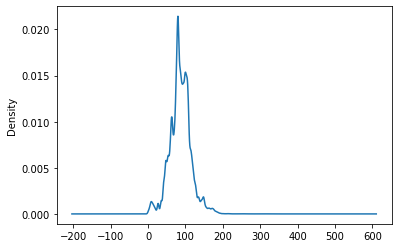

In [0]:
#Kernel density plot for settlement period
data2['SettlemenPeriod'].plot.kde()

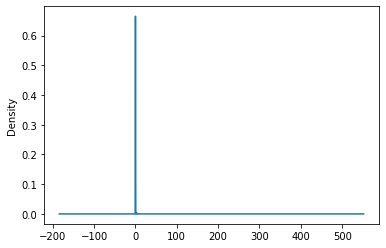

In [0]:
#Kernel density plot for length of stay
data2['LStay'].plot.kde()

In [0]:
#data2.to_stata('transformed_data3.dta')

In [0]:
#data2.to_csv('transformed_data5.csv')